### Stock Market Prediction And Forecasting Using Stacked LSTM

In [7]:
### Keras and Tensorflow >2.0
# %pip install pandas_datareader
# %pip install tensorflow tensorflow-gpu keras

In [8]:
### Data Collection
import pandas_datareader.tiingo as pdr
key="613975c40973bcc6c6b4df146bc017a146260c53"

In [9]:
df = pdr.TiingoDailyReader('AAPL', api_key=key)

In [10]:
# df.to_csv('AAPL.csv')

In [11]:
import pandas as pd

In [12]:
df=pd.read_csv('AAPL.csv')

In [13]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [14]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [15]:
df1=df.reset_index()['open']

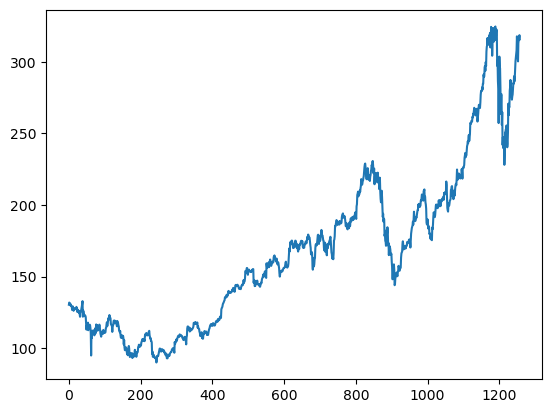

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [17]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [18]:
import numpy as np

In [19]:
df1

0       130.34
1       131.86
2       131.23
3       131.20
4       129.86
         ...  
1253    313.17
1254    315.03
1255    316.68
1256    318.66
1257    315.77
Name: open, Length: 1258, dtype: float64

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
print(df1)

[[0.17185703]
 [0.17833255]
 [0.17564862]
 ...
 [0.96570528]
 [0.9741405 ]
 [0.96182848]]


In [22]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [23]:
training_size,test_size

(817, 441)

In [24]:
train_data

array([[0.17185703],
       [0.17833255],
       [0.17564862],
       [0.17552081],
       [0.16981212],
       [0.1732203 ],
       [0.16861926],
       [0.16827845],
       [0.16572232],
       [0.15634985],
       [0.16154731],
       [0.16691518],
       [0.16267627],
       [0.15379372],
       [0.15775572],
       [0.16069527],
       [0.15860776],
       [0.16065266],
       [0.15971542],
       [0.15967282],
       [0.15852256],
       [0.16555191],
       [0.16048226],
       [0.15106718],
       [0.15153581],
       [0.15720189],
       [0.15519959],
       [0.14885187],
       [0.15289908],
       [0.14689217],
       [0.14420824],
       [0.13607123],
       [0.14923529],
       [0.15353811],
       [0.15217484],
       [0.16078047],
       [0.16648916],
       [0.17454096],
       [0.18255016],
       [0.13628424],
       [0.15421974],
       [0.15047075],
       [0.14097048],
       [0.14220594],
       [0.14122609],
       [0.13769011],
       [0.13888297],
       [0.134

In [25]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [26]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [28]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [29]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 256ms/step - loss: 0.0318 - val_loss: 0.0469
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.0013 - val_loss: 0.0103
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 7.9573e-04 - val_loss: 0.0041
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 6.2700e-04 - val_loss: 0.0040
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 5.8363e-04 - val_loss: 0.0038
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 6.1881e-04 - val_loss: 0.0037
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 5.5161e-04 - val_loss: 0.0036
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 6.4288e-04 - val_loss: 0.0035
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 5.4495e-04 - val_loss: 0.0036
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 5.9049e-04 - val_loss: 0.0039
Epoch 12

In [35]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [36]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

141.18397255055947

In [38]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

237.5165811617772

In [39]:
import numpy as np
import plotly.graph_objects as go

# Assuming df1, train_predict, and test_predict are numpy arrays
look_back = 100

# Prepare data for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Create a Plotly figure
fig = go.Figure()

# Add the baseline (original data)
fig.add_trace(go.Scatter(
    y=scaler.inverse_transform(df1).flatten(),
    mode='lines',
    name='Baseline'
))

# Add train predictions
fig.add_trace(go.Scatter(
    y=trainPredictPlot.flatten(),
    mode='lines',
    name='Train Predictions'
))

# Add test predictions
fig.add_trace(go.Scatter(
    y=testPredictPlot.flatten(),
    mode='lines',
    name='Test Predictions'
))

# Customize the layout
fig.update_layout(
    title="Baseline and Predictions",
    xaxis_title="Time",
    yaxis_title="Value",
    legend=dict(x=0, y=1, bgcolor='rgba(255,255,255,0)', bordercolor='rgba(0,0,0,0)'),
    template="plotly"
)

# Show the plot
fig.show()


In [40]:
len(test_data)

441

In [41]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9788001]
101
1 day input [0.87862651 0.8825033  0.86818898 0.89396328 0.8825459  0.92546756
 0.93980318 0.9442338  0.96579048 0.94512845 0.95254122 0.96395859
 0.96787799 0.97379968 0.97098794 0.98091424 0.93750266 0.94832361
 0.99880714 0.98216461 0.98381119 0.91296383 0.95986879 0.99484514
 0.99079794 0.9899459  0.95505474 0.99518596 0.9861117  0.99769948
 1.         0.9600818  0.97984919 0.99105355 0.97397009 0.88297193
 0.89869211 0.83725983 0.81412687 0.71256337 0.81915392 0.9102799
 0.87947855 0.87555915 0.81796106 0.74021216 0.79725642 0.79832148
 0.70693989 0.7450688  0.6473395  0.67102629 0.63805223 0.67049376
 0.66962041 0.58825033 0.6235249  0.68482938 0.66680867 0.69334981
 0.68478678 0.70549142 0.66672347 0.64048055 0.65096068 0.68546841
 0.77024667 0.73590934 0.76130022 0.75963873 0.80944063 0.81966515
 0.84088101 0.82942104 0.8007072  0.79359264 0.78221787 0.79184595
 0.79751204 0.81710902 0.83108252 0.82959145 0.85187236 0.83606697
 0.8485068  0.87359945 0.89660461 0

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df1)

1258

In [47]:
import plotly.graph_objects as go

# Assuming day_new, day_pred, df1, and lst_output are numpy arrays
# Inverse transform the data using the scaler
baseline_data = scaler.inverse_transform(df1[1158:])
predicted_data = scaler.inverse_transform(lst_output)

# Create a Plotly figure
fig = go.Figure()

# Add the baseline data
fig.add_trace(go.Scatter(
    x=day_new,
    y=baseline_data.flatten(),
    mode='lines',
    name='Baseline Data'
))

# Add the predicted data
fig.add_trace(go.Scatter(
    x=day_pred,
    y=predicted_data.flatten(),
    mode='lines',
    name='Predicted Data'
))

# Customize the layout
fig.update_layout(
    title="Baseline and Predicted Data",
    xaxis_title="Day",
    yaxis_title="Value",
    legend=dict(x=0, y=1, bgcolor='rgba(255,255,255,0)', bordercolor='rgba(0,0,0,0)'),
    template="plotly"
)

# Show the plot
fig.show()


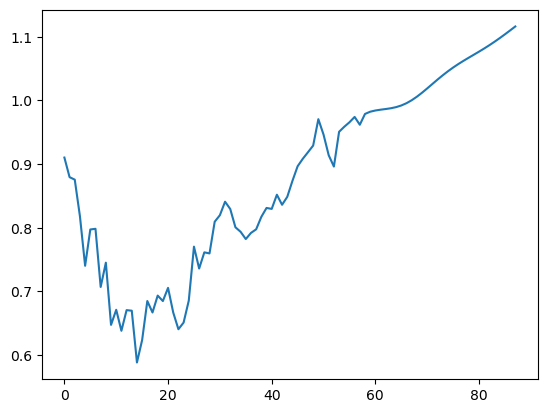

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

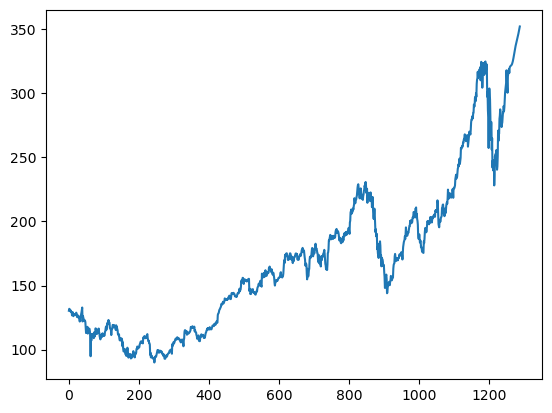

In [50]:
plt.plot(df3)